In [2]:
%pip install pdfplumber pandas
%pip install PyPDF2
%pip install pymupdf
%pip install pycryptodome
%pip install tabulate
%pip install matplotlib




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
%pip install contractions langdetect requests nltk spacy
%pip install unidecode
%pip install beautifulsoup4
import numpy as np
import pandas as pd  # library for data manipulation and analysis
import re  # library for regular expressions
import os  # library for operating system dependent functionality
import string  # library for string operations
import nltk  # library for natural language processing
import spacy  # library for advanced natural language processing
import requests  # library for making HTTP requests
import contractions  # library for expanding contractions
from langdetect import detect  # library for language detection
from nltk.corpus import stopwords  # library for stop words
from nltk.stem import WordNetLemmatizer  # library for lemmatizing words
from nltk.tokenize import word_tokenize, sent_tokenize  # libraries for tokenizing text
from unidecode import unidecode  # library for converting accented characters
from bs4 import BeautifulSoup  # library for parsing HTML and XML documents
from nltk.sentiment import SentimentIntensityAnalyzer  # library for sentiment analysis
nltk.download('vader_lexicon')  # download the VADER sentiment analysis lexicon
nltk.download('wordnet')  # download WordNet for lemmatization
nltk.download('stopwords')  # download stopwords for text preprocessing
nltk.download('punkt')  # download the Punkt tokenizer for sentence segmentation
nltk.download('maxent_ne_chunker')  # download the maximum entropy chunker for named entity recognition
nltk.download('averaged_perceptron_tagger')  # download the averaged perceptron tagger for part-of-speech tagging
nltk.download('words')  # download the NLTK corpus of words

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data] 

True

In [4]:
import os
import pandas as pd
from pdfminer.high_level import extract_text
from pathlib import Path
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Definiere den Pfad zum Ordner mit den PDFs
pdf_folder = '/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainabilityReports_2020'

# Initialisiere ein leeres DataFrame für die Ergebnisse
result_df = pd.DataFrame(columns=['company', 'content', 'datatype', 'date', 'internal', 'title'])

def process_pdf(pdf_path):
    # Extrahiere den Unternehmensnamen und das Jahr aus dem Dateinamen
    match = re.match(r'(.+?)_(\d+)_SR\.pdf', pdf_path.name)
    if match:
        company_name = match.group(1)
        report_year = int(match.group(2))

        # Öffne die PDF-Datei und extrahiere den Text
        text = extract_text(pdf_path)

        # Extrahiere das Jahr aus dem Dateinamen
        date_match = re.match(r'.+?_(\d+)_SR\.pdf', pdf_path.name)
        date = int(date_match.group(1)) if date_match else None

        # Finde das am häufigsten vorkommende Wort (Title)
        words = word_tokenize(text.lower())
        title = FreqDist(words).max() if words else None

        # Füge die extrahierten Informationen zum DataFrame hinzu
        result_df.loc[len(result_df)] = {
            'company': company_name,
            'content': text,
            'datatype': 'Sustainability Report',
            'date': date,
            'internal': 1,
            'title': title
        }

# Iteriere über alle Dateien im PDF-Ordner
for pdf_path in Path(pdf_folder).glob('*.pdf'):
    process_pdf(pdf_path)

# Speichere das DataFrame als CSV-Datei
result_df.to_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainReports2020.csv', index=False)


The PDF <_io.BufferedReader name='/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainabilityReports_2020/Infineon_2020_SR.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case
The PDF <_io.BufferedReader name='/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainabilityReports_2020/HeidelbergMaterials_2020_SR.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case
The PDF <_io.BufferedReader name='/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainabilityReports_2020/Vonovia_2020_SR.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case
The PDF <_io

In [5]:
# Sortiere das DataFrame nach dem Unternehmensnamen
sorted_df = df.sort_values('company')

# Gib eine Liste der Unternehmensnamen aus
companies = sorted_df['company'].tolist()
print(companies)


NameError: name 'df' is not defined

In [6]:
df.shape

NameError: name 'df' is not defined

In [7]:
import pandas as pd
# Zeige den Inhalt der CSV-Datei an
df = pd.read_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainReports2020.csv')
df.head()


,company,content,datatype,date,internal,title
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,","
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the


In [8]:
df.head(37)

,company,content,datatype,date,internal,title
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,","
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,","
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the


In [19]:
df.shape

(37, 6)

In [9]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/SustainReports2020.csv')

# Check datatypes
print(df.dtypes)


company     object
content     object
datatype    object
date         int64
internal     int64
title       object
dtype: object


In [10]:
import pandas as pd
import os

# Define function to save intermediary steps in a file
def csv_checkpoint(df, filename='checkpoint'):
    """
    Saves a DataFrame to a CSV file and loads it back into a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to save and load.
        filename (str): The name of the CSV file to save the DataFrame to (default: 'checkpoint').

    Returns:
        pandas.DataFrame: The loaded DataFrame.
    """
    if not os.path.exists('../data/checkpoints/'):  # Check if the directory exists and create it if it doesn't
        os.makedirs('../data/checkpoints/')

    # Save DataFrame to CSV
    df.to_csv(f'../data/checkpoints/{filename}.csv', index=False, sep='|')  # Save DataFrame to CSV with specified filename
    print(f'Saved DataFrame to {filename}.csv')

    # Load CSV back into DataFrame
    df = pd.read_csv(f'../data/checkpoints/{filename}.csv', delimiter='|')  # Load CSV back into DataFrame
    print(f'Loaded DataFrame from {filename}.csv')

    return df


**General Data Cleaning**

As initial data cleaning steps, the following is conducted:


* Duplicate entries were identified and removed, resulting in a cleaner and more concise dataset. Duplicates can distort the data and lead to biased analysivs.
* Language checking was conducted and all rows with non-English content were dropped to ensure consistent language. Language inconsistencies can create bias in the data and lead to inaccurate conclusions. Therefore, it is important to ensure that the data is consistent in language to prevent linguistic biases.
* Remove company name parts like "AG" for clarity
* The "sample" method was used to check the data for representativeness and potential issues.

In [11]:
# Check for duplicates and delete them
duplicates = df[df.duplicated()]
print(f'Duplicated rows: {len(duplicates)}')
df = df.drop_duplicates()


Duplicated rows: 0


In [12]:
general_cleaned_data = df.copy(deep=True)

In [13]:
from langdetect import detect

# Check for other languages than English
general_cleaned_data['language'] = general_cleaned_data['content'].apply(lambda x: detect(x))
not_english = len(general_cleaned_data.loc[general_cleaned_data['language'] != 'en'])

# Print the number of rows with other languages
print(f'Number of rows with language other than English: {not_english}')

# Drop the 'language' column
general_cleaned_data.drop(['language'], axis=1, inplace=True)

Number of rows with language other than English: 2


In [14]:
general_cleaned_data.head(37)

,company,content,datatype,date,internal,title
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,","
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,","
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the


In [15]:
general_cleaned_data.shape

(37, 6)

**Text Data Cleaning & Preprocessing**

The "content" column, containing the text of the reports, undergoes a series of cleaning, normalization, and preprocessing steps to ensure accurate and efficient analysis. These steps include:

* String conversion: Converting the input to a string format ensures consistency and compatibility during subsequent processing tasks.
* Lowercase conversion: Transforming all text to lowercase serves as a simple normalization step, reducing the complexity and variability of the input data.
* Unicode decoding: Removing diacritics (e.g., accented characters) and normalizing the text encoding mitigates potential discrepancies arising from different encoding formats.
* URL and email address removal: Eliminating URLs and email addresses reduces noise in the dataset, as these elements do not contribute valuable information for the analysis.
* Extra whitespace removal: Eradicating extra whitespaces improves text analysis and tokenization by ensuring that only meaningful spaces are retained.
* Contact detail removal: Excluding phone numbers, contact person strings, and social media references further minimizes noise in the dataset, honing the focus on relevant text.
* Table of contents removal: Discarding the table of contents enhances the data quality by eliminating repetitive and non-essential information.
* Named entity removal: Employing the spaCy model to remove human names and other named entities optimizes the text for analysis and modeling by concentrating on pertinent content.
* Abbreviation expansion: Utilizing the contractions library and custom functions with regular expressions, common and uncommon abbreviations are expanded to improve text interpretation.
* Special character elimination: Excluding all special characters, except punctuation, refines the input data. Retaining punctuation is necessary for accurate sentence tokenization and removed after sentence tokenization..
* Tokenization and lemmatization: Tokenizing words and sentences, and subsequently lemmatizing words using the WordNetLemmatizer from nltk, streamlines the text and reduces morphological variations.
* Stopword removal: Customizing the nltk stopwords list by adding or removing specific stopwords enables more precise and tailored text analysis.
* Part-of-speech (POS) tagging: Assigning POS tags to words and sentences enhances the text representation by providing additional linguistic information, which may be beneficial for subsequent analysis and modeling tasks.
* Sentiment Analysis: Basic sentiment value calculation on the tokenzued sentences to get first insights im terms of the sentiments in the reports within the EDA.

In [16]:
cleaned_data= general_cleaned_data.copy(deep=True)

In [17]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,","
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,","
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the


In [20]:
general_cleaned_data.shape

(37, 6)

In [22]:
!python -m spacy download en_core_web_md
# Since the spacy model shows better results on the "raw" text, the named entity removal is conducted before all normalization and cleaning steps
spacy_model = spacy.load('en_core_web_md')
spacy_model.max_length = 1800000 # Increase max text length

def remove_named_entities(text):
    """
    Removes named entities from text and returns the modified text and the count of named entities removed.

    Args:
        text (str): The text to remove named entities from.

    Returns:
        tuple: A tuple containing the modified text (str) and the count of named entities removed (int).
    """
    doc = spacy_model(text)
    
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)
    
    named_entities_count = len(named_entities)
    
    for named_entity in named_entities:
        text = text.replace(named_entity, '')
    
    return text, named_entities_count

# Assuming cleaned_data is a pandas DataFrame with a 'content' column
cleaned_data['cleaned_content'], name_entity_count = zip(*cleaned_data['content'].apply(remove_named_entities))
print("Name entities removed:", sum(name_entity_count))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 3.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Name entities removed: 4712


In [23]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,Sustainability at \nSupplementing the Annual R...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",Unternehmens-\nporträt\n\nStrategie & \nManage...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,SUSTAINABILITY MANAGEMENT \nSustainability str...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,66 \n\nCommerzbank Annual Report 2020 \n\nand ...
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",SUSTAINABILITY \nREPORT\n\nSample to Insight\n...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,Sustainability Report\n\n2020\n\n 02\n\nAbout ...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,Sustainability Report 2020\n\nSpur\n\nWE ARE C...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,Overview / Sustainability\n\n13\n\nSustainab...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,New ways for\na sustainable future.\nSustainab...


In [24]:
def remove_urls(text):
    urls = re.findall(r'http\S+|www\S+|https\S+', text, flags=re.MULTILINE)
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE), len(urls)

def remove_emails(text):
    mail_addresses = re.findall(r'\S+@\S+\s?', text, flags=re.MULTILINE)
    return re.sub(r'\S+@\S+\s?', '', text, flags=re.MULTILINE), len(mail_addresses)

def remove_extra_whitespace(text):
    extra_spaces = re.findall(r'\s{2,}', text)
    return re.sub(r'\s+', ' ', text).strip(), len(extra_spaces)

cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].astype(str) # Convert all texts to string
cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].apply(lambda x: x.lower()) # Convert all texts to lower-case
cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].apply(lambda x: unidecode(x, errors="preserve")) # Remove diacritics / accented characters and unicode normalization
cleaned_data['cleaned_content'], url_count = zip(*cleaned_data['cleaned_content'].apply(remove_urls)) # Remove URLs from texts
cleaned_data['cleaned_content'], email_count = zip(*cleaned_data['cleaned_content'].apply(remove_emails)) # Remove e-mail addresses from texts
cleaned_data['cleaned_content'], extra_space_count = zip(*cleaned_data['cleaned_content'].apply(remove_extra_whitespace)) # Remove extra whitespaces from texts

print("URLs removed:", sum(url_count))
print("Mail addresses removed:", sum(email_count))
print("Extra whitespaces removed:", sum(extra_space_count))

URLs removed: 392
Mail addresses removed: 180
Extra whitespaces removed: 357770


In [25]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16-166 2manage- ment's report ...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens- portrat strategie & management w...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,66 commerzbank annual report 2020 and the effe...
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview / sustainability 13 sustainability is...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...


In [26]:
def remove_contact_details(text):
    # Remove phone numbers
    phone_regex = r'(?<!\d)[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9](?!\d)'
    phone_count = len(re.findall(phone_regex, text))
    text = re.sub(phone_regex, '', text)

    # Remove common contact-related phrases
    contact_phrases_regex = r'\b(?:Contact Person|Phone|Tel|Fax|Mobile|E?mail|Skype|Twitter|Facebook|LinkedIn|Website):\s*\S+'
    contact_phrases_count = len(re.findall(contact_phrases_regex, text, flags=re.IGNORECASE))
    text = re.sub(contact_phrases_regex, '', text, flags=re.IGNORECASE)

    total_count = phone_count + contact_phrases_count
    return text, total_count

def remove_table_of_contents(text):
    # Remove common table of contents phrases
    toc_phrases_regex = r'\b(?:Table of Contents|Contents)\b'
    toc_phrases_count = len(re.findall(toc_phrases_regex, text, flags=re.IGNORECASE))
    text = re.sub(toc_phrases_regex, '', text, flags=re.IGNORECASE)

    # Remove content with numbering like "1. Introduction", "1.1. Background", "A. Overview", etc.
    toc_entries_regex = r'(^|\n)\s*\d+(\.\d+)*\s+\w+([\w\s]+)?'
    toc_entries_count = len(re.findall(toc_entries_regex, text))
    text = re.sub(toc_entries_regex, '', text)

    total_count = toc_phrases_count + toc_entries_count
    return text, total_count

cleaned_data['cleaned_content'], contact_count = zip(*cleaned_data['cleaned_content'].apply(remove_contact_details))
cleaned_data['cleaned_content'], toc_count = zip(*cleaned_data['cleaned_content'].apply(remove_table_of_contents))
print("Contact information removed:", sum(contact_count))
print("TOCs removed:", sum(toc_count))

Contact information removed: 3882
TOCs removed: 211


In [27]:
cleaned_data.shape

(37, 7)

In [28]:
company_data = cleaned_data[cleaned_data["company"] == "Bayer"]
print("Content:\n", company_data["content"].str.cat(sep="\n"))
print("\nCleaned Content:\n", company_data["cleaned_content"].str.cat(sep="\n"))

Content:
 Sustainability Report

2020

Contents 

Contents 

Editorial ...............................................    3 

About this Report ................................    4 

Sustainability Strategy .........................    5 

Performance Report 

3. Product Stewardship ...........................................     26 

7. Climate Protection ...................................................     65 

3.1  Management Approach .....................................     26 

7.1  Management Approach ....................................     65 

3.2  Regulatory Conditions .......................................     26 

7.2  Climate Strategy ...............................................     65 

3.3  Assessments and Testing ..................................     27 

7.3  Risk and Opportunity Analysis ...........................     66 

3.4  Animal Welfare ..................................................     28 

7.4  Greenhouse Gas Emissions .........................

In [29]:
def expand_contractions(text):
    expanded_text = []
    for word in text.split():
        expanded_text.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_text)
    return contractions.fix(expanded_text)

cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].apply(expand_contractions)

In [30]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16-166 2manage- ment's report ...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens- portrat strategie & management w...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,(especially independently. particularly with r...
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview / sustainability 13 sustainability is...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...


In [31]:
cleaned_data.shape

(37, 7)

In [32]:
company_data = cleaned_data[cleaned_data["company"] == "BMW"]
print("Content:\n", company_data["content"].str.cat(sep="\n"))
print("\nCleaned Content:\n", company_data["cleaned_content"].str.cat(sep="\n"))

Content:
 BMW Group

Combined Management Report

Report 2020

35

COMBINED   
MANAGEMENT  REPORT

36 
36 
37 
41 
56 
58 
62 

69 
73 
76 
80 
84 

87 

91 
95 
99 
100 

105 
109 

113 
116 
119 

General  Information and Group Profile

Core Values and Guiding Principles

Organisation and  Business Model

Strategy, Goals and Management System

How the BMW Group creates value 

Compliance and Human Rights

Innovation and Customer Orientation

Products and  Services

Design and Product Safety

Carbon Emissions and Pollutants

Electric Mobility

Mobility Patterns

Production,  Purchasing and 
 Supplier Network

Production Network

Resource Consumption and Resource Efficiency

Renewable Energy

Purchasing and Supplier Network

Employees and  Society

Long-term Employee Development and 
Employer Attractiveness

Health and Performance

Employee Diversity

Corporate Citizenship

122 
122 
126 

127 
142 
142 
148 
150 
153 
154 

159 

159 
164 

179 

180 

Report on  Economic Position

Gen

In [33]:
# Expand custom abbreviations which are not captured by "contractions"
# Basic idea from: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
# Compile the regular expressions only once for efficiency
specific_patterns = [
    (re.compile(r"won['’]t"), "will not"),
    (re.compile(r"can['’]t"), "can not"),
]

def decontracted(phrase):
    """
    Expands contractions in a given phrase and returns the modified phrase and the count of contractions expanded.

    Args:
        phrase (str): The phrase to expand contractions in.

    Returns:
        tuple: A tuple containing the modified phrase (str) and the count of contractions expanded (int).
    """
    count = 0

    # Replace specific patterns
    for pattern, replacement in specific_patterns:
        matches = len(pattern.findall(phrase))
        count += matches
        phrase = pattern.sub(replacement, phrase)

    return phrase, count

# Apply the function to expand abbreviations
cleaned_data['cleaned_content'], abbreviation_counts = zip(*cleaned_data['cleaned_content'].apply(decontracted))
print("Expanded custom abbreviations:", sum(abbreviation_counts))

Expanded custom abbreviations: 0


In [34]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16-166 2manage- ment's report ...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens- portrat strategie & management w...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,(especially independently. particularly with r...
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview / sustainability 13 sustainability is...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...


In [35]:
# Remove special characters excl. punctuation since this is needed by the sentence tokenization
def remove_non_alphanumeric(text, remove_punctuation=False):
    if remove_punctuation:
        pattern = r'[^a-zA-Z0-9\s]'
    else:
        pattern = r'[^a-zA-Z0-9\s.,!?\'"]'
    
    special_chars = re.findall(pattern, text)
    return re.sub(pattern, '', text), len(special_chars)

cleaned_data['cleaned_content'], special_char_count = zip(*cleaned_data['cleaned_content'].apply(remove_non_alphanumeric, remove_punctuation=False))
print("Special characters excl. punctuation removed:", sum(special_char_count))

Special characters excl. punctuation removed: 130811


In [36]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16166 2manage ment's report ov...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wir...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently. particularly with re...
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability 13 sustainability is ...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...


In [37]:
cleaned_data.shape

(37, 7)

In [38]:
def tokenize_words(text):
    # Remove numbers, digits, and punctuation
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize words
    tokens = word_tokenize(text)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens, len(tokens)

cleaned_data['word_tokens'], word_token_count = zip(*cleaned_data['cleaned_content'].apply(tokenize_words))
print("Generated word token amount:", sum(word_token_count))

Generated word token amount: 1699075


In [39]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...,"[sustainability, at, supplementing, the, annua..."
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16166 2manage ment's report ov...,"[chapter, page, 2manage, ments, report, overvi..."
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wir...,"[unternehmens, portrat, strategie, management,..."
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"[sustainability, management, sustainability, s..."
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently. particularly with re...,"[especially, independently, particularly, with..."
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...,"[sustainability, report, sample, to, insight, ..."
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...,"[sustainability, report, about, this, report, ..."
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...,"[sustainability, report, spur, we, are, changi..."
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability 13 sustainability is ...,"[overview, sustainability, sustainability, is,..."
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...,"[new, way, for, a, sustainable, future, sustai..."


In [40]:
def tokenize_sentences(text):
    # Tokenize sentences
    tokens = sent_tokenize(text)
    
    return tokens, len(tokens)

cleaned_data['sentence_tokens'], sentence_token_count = zip(*cleaned_data['cleaned_content'].apply(tokenize_sentences))
print("Generated sentence token amount:", sum(sentence_token_count))

Generated sentence token amount: 64339


In [41]:
cleaned_data.head(37)   

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...,"[sustainability, at, supplementing, the, annua...",[sustainability at supplementing the annual re...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16166 2manage ment's report ov...,"[chapter, page, 2manage, ments, report, overvi...",[chapter 2 pages 16166 2manage ment's report o...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wir...,"[unternehmens, portrat, strategie, management,...",[unternehmens portrat strategie management wi...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"[sustainability, management, sustainability, s...",[sustainability management sustainability stra...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently. particularly with re...,"[especially, independently, particularly, with...","[especially independently., particularly with ..."
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...,"[sustainability, report, sample, to, insight, ...",[sustainability report sample to insight at qi...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...,"[sustainability, report, about, this, report, ...",[sustainability report 2020 02 about this repo...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...,"[sustainability, report, spur, we, are, changi...",[sustainability report 2020 spur we are changi...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability 13 sustainability is ...,"[overview, sustainability, sustainability, is,...",[overview sustainability 13 sustainability is...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...,"[new, way, for, a, sustainable, future, sustai...","[new ways for a sustainable future., sustainab..."


In [42]:
def remove_stopwords_from_word_tokens(tokens, custom_stopwords):
    """
    Removes stopwords and one-character tokens from a list of word tokens and returns the modified list and the count of removed items.

    Args:
        tokens (list): The list of word tokens to remove stopwords from.
        custom_stopwords (list): A list of custom stopwords to remove from the word tokens.

    Returns:
        tuple: A tuple containing the modified list of word tokens (list) and the count of removed items (int).
    """
    filtered_tokens = [
        token for token in tokens
        if token.lower() not in custom_stopwords and len(token) > 1
    ]
    
    return filtered_tokens, len(tokens) - len(filtered_tokens)

def remove_stopwords_from_sentence_tokens(sentences_list, custom_stopwords):
    """
    Removes stopwords, one-character tokens, digits, numbers, and special characters (excluding whitespace) from a list of sentence tokens and returns the modified list and the count of removed items.

    Args:
        sentences_list (list): The list of sentence tokens to remove stopwords from.
        custom_stopwords (list): A list of custom stopwords to remove from the sentence tokens.

    Returns:
        tuple: A tuple containing the modified list of sentence tokens (list) and the count of removed items (int).
    """
    filtered_sentences_list = []
    total_removed_items_count = 0

    for sentence in sentences_list:
        # Tokenize the sentence into words
        word_tokens = word_tokenize(sentence)

        # Remove stopwords, one-character tokens, digits, numbers, and special characters (excluding whitespace) from word tokens
        filtered_word_tokens = [
            re.sub(rf"[{re.escape(string.punctuation)}]", '', token) for token in word_tokens
            if token.lower() not in custom_stopwords
            and len(token) > 1
            and not re.search(r'\d', token)
            and not re.search(r'\W', token)
        ]

        # Reconstruct the sentence without the removed words and special characters
        filtered_sentence = ' '.join(filtered_word_tokens)
        removed_items_count = len(word_tokens) - len(filtered_word_tokens)
        filtered_sentences_list.append(filtered_sentence)
        total_removed_items_count += removed_items_count

    return filtered_sentences_list, total_removed_items_count

# Define custom stopwords to add or remove (the extra stopwords were identified by the TFIDF based wordcloud)
custom_stopwords = {
    'add': ['said','company','companies','year','billion','million','siemens','linde','rwe','volkswagen','symrise','porsche','sap','adidas','puma','airbus','bmw','hannover','mtu','heiderbergcement','qiagen','benz','continental','bayer','fresenius','wa', 'ha', 'eur', 'allianz', 'board'],
    'remove': [''] # Currently not needed
}

# Combine stopwords to filter the content of the reports
all_stopwords = set(stopwords.words('english'))
all_stopwords |= set(custom_stopwords['add'])
all_stopwords -= set(custom_stopwords['remove'])

cleaned_data['word_tokens'], stopword_count_words = zip(*cleaned_data['word_tokens'].apply(remove_stopwords_from_word_tokens, custom_stopwords=all_stopwords))
cleaned_data['sentence_tokens'], stopword_count_sentences = zip(*cleaned_data['sentence_tokens'].apply(remove_stopwords_from_sentence_tokens, custom_stopwords=all_stopwords))

print("Removed stopwords in word tokens", sum(stopword_count_words))
print("Removed stopwords in sentence tokens", sum(stopword_count_sentences))

Removed stopwords in word tokens 669636
Removed stopwords in sentence tokens 905930


In [43]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability at supplementing the annual rep...,"[sustainability, supplementing, annual, report...",[sustainability supplementing annual report na...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter 2 pages 16166 2manage ment's report ov...,"[chapter, page, 2manage, ments, report, overvi...",[chapter pages ment report overview nonfinanci...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wir...,"[unternehmens, portrat, strategie, management,...",[unternehmens portrat strategie management wir...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"[sustainability, management, sustainability, s...",[sustainability management sustainability stra...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently. particularly with re...,"[especially, independently, particularly, rega...","[especially independently, particularly regard..."
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample to insight at qia...,"[sustainability, report, sample, insight, comm...",[sustainability report sample insight commitme...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report 2020 02 about this repor...,"[sustainability, report, report, value, le, re...",[sustainability report report value less resou...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report 2020 spur we are changin...,"[sustainability, report, spur, changing, lane,...",[sustainability report spur changing lanes for...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability 13 sustainability is ...,"[overview, sustainability, sustainability, con...",[overview sustainability sustainability contin...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new ways for a sustainable future. sustainabil...,"[new, way, sustainable, future, sustainability...","[new ways sustainable future, sustainability r..."


In [44]:
# Update the cleaned content based on the cleaned word tokens
cleaned_data['cleaned_content'] = cleaned_data['word_tokens'].apply(lambda x: ' '.join(x))

In [45]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"[sustainability, supplementing, annual, report...",[sustainability supplementing annual report na...
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"[chapter, page, 2manage, ments, report, overvi...",[chapter pages ment report overview nonfinanci...
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"[unternehmens, portrat, strategie, management,...",[unternehmens portrat strategie management wir...
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"[sustainability, management, sustainability, s...",[sustainability management sustainability stra...
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently particularly regard r...,"[especially, independently, particularly, rega...","[especially independently, particularly regard..."
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample insight commitmen...,"[sustainability, report, sample, insight, comm...",[sustainability report sample insight commitme...
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report report value le resource...,"[sustainability, report, report, value, le, re...",[sustainability report report value less resou...
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report spur changing lane forew...,"[sustainability, report, spur, changing, lane,...",[sustainability report spur changing lanes for...
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability sustainability continu...,"[overview, sustainability, sustainability, con...",[overview sustainability sustainability contin...
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new way sustainable future sustainability repo...,"[new, way, sustainable, future, sustainability...","[new ways sustainable future, sustainability r..."


In [46]:
def pos_tagging_tokens(word_tokens, sentence_list):
    """
    Performs POS tagging on a given list of word tokens and a list of sentence tokens and returns the POS tagged word tokens and POS tagged sentence tokens.

    Args:
        word_tokens (list): The list of word tokens to perform POS tagging on.
        sentence_list (list): The list of sentence tokens to perform POS tagging on.

    Returns:
        tuple: A tuple containing the POS tagged word tokens (list) and the POS tagged sentence tokens (list of lists).
    """
    
    # POS tagging for word tokens
    pos_tagged_word_tokens = nltk.pos_tag(word_tokens)

    # Create a dictionary to map word tokens to their POS tags, this reduces the effort to call nltk.pos_tag twice
    pos_tags_dict = dict(pos_tagged_word_tokens)

    # POS tagging for sentence tokens
    pos_tagged_sentence_list = []
    for sentence in sentence_list:
        tokenized_sentence = nltk.word_tokenize(sentence)
        pos_tagged_sentence = [(token, pos_tags_dict[token]) for token in tokenized_sentence if token in pos_tags_dict]
        pos_tagged_sentence_list.append(pos_tagged_sentence)

    return pos_tagged_word_tokens, pos_tagged_sentence_list

# Apply POS tagging
pos_tags = cleaned_data.apply(lambda row: pos_tagging_tokens(row['word_tokens'], row['sentence_tokens']), axis=1)
cleaned_data['pos_tagged_word_tokens'], cleaned_data['pos_tagged_sentence_tokens'] = zip(*pos_tags)

In [47]:
cleaned_data.shape

(37, 11)

In [48]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"[sustainability, supplementing, annual, report...",[sustainability supplementing annual report na...,"[(sustainability, NN), (supplementing, VBG), (...","[[(sustainability, NN), (supplementing, VBG), ..."
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"[chapter, page, 2manage, ments, report, overvi...",[chapter pages ment report overview nonfinanci...,"[(chapter, NN), (page, NN), (2manage, CD), (me...","[[(chapter, NN), (ment, NN), (report, NN), (ov..."
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"[unternehmens, portrat, strategie, management,...",[unternehmens portrat strategie management wir...,"[(unternehmens, NNS), (portrat, VBP), (strateg...","[[(unternehmens, VBZ), (portrat, JJ), (strateg..."
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"[sustainability, management, sustainability, s...",[sustainability management sustainability stra...,"[(sustainability, NN), (management, NN), (sust...","[[(sustainability, NN), (management, NN), (sus..."
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently particularly regard r...,"[especially, independently, particularly, rega...","[especially independently, particularly regard...","[(especially, RB), (independently, RB), (parti...","[[(especially, RB), (independently, RB)], [(pa..."
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample insight commitmen...,"[sustainability, report, sample, insight, comm...",[sustainability report sample insight commitme...,"[(sustainability, NN), (report, NN), (sample, ...","[[(sustainability, NN), (report, NN), (sample,..."
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report report value le resource...,"[sustainability, report, report, value, le, re...",[sustainability report report value less resou...,"[(sustainability, NN), (report, NN), (report, ...","[[(sustainability, NN), (report, NN), (report,..."
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report spur changing lane forew...,"[sustainability, report, spur, changing, lane,...",[sustainability report spur changing lanes for...,"[(sustainability, NN), (report, NN), (spur, VB...","[[(sustainability, NN), (report, NN), (spur, V..."
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability sustainability continu...,"[overview, sustainability, sustainability, con...",[overview sustainability sustainability contin...,"[(overview, NN), (sustainability, NN), (sustai...","[[(overview, VBP), (sustainability, NN), (sust..."
9,RWE,New ways for\na sustainable future.\nSustainab...,Sustainability Report,2020,1,the,new way sustainable future sustainability repo...,"[new, way, sustainable, future, sustainability...","[new ways sustainable future, sustainability r...","[(new, JJ), (way, NN), (sustainable, JJ), (fut...","[[(new, JJ), (sustainable, JJ), (future, JJ)],..."


In [49]:
# Create checkpoint file
cleaned_data = csv_checkpoint(cleaned_data, 'cleaned_data')

Saved DataFrame to cleaned_data.csv
Loaded DataFrame from cleaned_data.csv


In [50]:
cleaned_data_new = cleaned_data.copy(deep=True)

**Data Enrichment**

Several additional information will be incorporated that are not currently present in the dataset. This includes sector, industry, market capitilazation and the ESG scores of the DAX companies, which will serve to enhance the dataset for further analysis.

In [51]:
url = 'https://disfold.com/stock-index/dax/companies/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')
scraped_data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    scraped_data.append(cols)

def clean_scraped_data_new(data):
    cleaned_data_new = []
    
    for row in data:
        # Remove empty rows
        if len(row) > 0:
            # Remove the '$' and ',' signs from the market cap and convert it to float
            market_cap = float(row[3].replace('$', '').replace(',', '').replace('B', ''))
            cleaned_data_new.append([row[1], row[2], market_cap, row[4], row[5], row[6]])
    
    df = pd.DataFrame(cleaned_data_new, columns=['company_name', 'symbol', 'market_cap_in_usd_b', 'country', 'sector', 'industry'])
    
    return df

company_enrichments = clean_scraped_data_new(scraped_data)
company_enrichments.to_csv('../data/dax_company_sectors.csv', index=False)
company_enrichments.head()

,company_name,symbol,market_cap_in_usd_b,country,sector,industry
0,SAP SE,SAP,161.41,Germany,Technology,Software—Application
1,Siemens AG,SIE,131.00,Germany,Industrials,Specialty Industrial Machinery
2,Airbus SE,AIR,113.90,Netherlands,Industrials,Aerospace & Defense
3,Deutsche Telekom AG,DTE,106.00,Germany,Communication Services,Telecom Services
4,Allianz SE,ALV,91.36,Germany,Financials,Insurance—Diversified


In [52]:
company_enrichments.head(45)

,company_name,symbol,market_cap_in_usd_b,country,sector,industry
0,SAP SE,SAP,161.41,Germany,Technology,Software—Application
1,Siemens AG,SIE,131.00,Germany,Industrials,Specialty Industrial Machinery
2,Airbus SE,AIR,113.90,Netherlands,Industrials,Aerospace & Defense
3,Deutsche Telekom AG,DTE,106.00,Germany,Communication Services,Telecom Services
4,Allianz SE,ALV,91.36,Germany,Financials,Insurance—Diversified
5,Mercedes-Benz Group AG,MBG,84.94,Germany,Consumer Discretionary,Auto Manufacturers
6,Volkswagen AG,VOW,77.55,Germany,Consumer Discretionary,Auto Manufacturers
7,Bayerische Motoren Werke AG,BMW,77.25,Germany,Consumer Discretionary,Auto Manufacturers
8,MERCK Kommanditgesellschaft auf Aktien,MRK,70.69,Germany,Healthcare,Drug Manufacturers—Specialty & Generic
9,Siemens Healthineers AG,SHL,62.71,Germany,Healthcare,Diagnostics & Research


In [53]:
# Define a dictionary with the old company names as keys and new company names as values
company_name_mapping = {
    "SAP": "SAP SE",
    "Infineon": "Infineon Technologies AG",
    "BASF": "BASF SE",
    "Porsche": "Porsche Automobil Holding SE",
    "Commerzbank": "Commerzbank AG",
    "Qiagen": "Qiagen N.V.",
    "Henkel": "Henkel AG & Co KGaA",
    "MercedesBenz": "Mercedes-Benz Group AG",
    "Airbus": "Airbus SE",
    "RWE": "RWE AG",
    "EON": "E.ON SE",
    "Volkswagen": "Volkswagen AG",
    "Brenntag": "Brenntag AG",
    "Vonovia": "Vonovia SE",
    "Sartorius": "Sartorius AG",
    "Telekom": "Deutsche Telekom AG",
    "Merck": "MERCK Kommanditgesellschaft auf Aktien",
    "DHL": "Deutsche Post AG",
    "Siemens": "Siemens AG",
    "SiemensEnergy": "Siemens Energy AG",
    "Symrise": "Symrise AG",
    "Rheinmetall": "Rheinmetall AG",
    "MTU": "MTU Aero Engines AG",
    "DeutscheBank": "Deutsche Bank AG",
    "DeutscheBoerse": "Deutsche Börse AG",
    "Zalando": "Zalando SE",
    "MuenchenerRueck": "Münchener Rückversicherungs-Gesellschaft Aktiengesellschaft in München",
    "Bayer": "Bayer AG",
    "Continental": "Continental AG",
    "Allianz": "Allianz SE",
    "Beiersdorf": "Beiersdorf AG",
    "HannoverRueck": "Hannover Rück SE",
    "Fresenius": "Fresenius SE & Co KGaA",
    "Adidas": "adidas AG",
    "Covestro": "Covestro AG",
    "BMW": "Bayerische Motoren Werke AG",
    "HeidelbergMaterials": "Heidelberg Materials AG",

    # Add more mappings as needed
}

# Replace the company names in the 'Company' column
cleaned_data_new['company'] = cleaned_data_new['company'].replace(company_name_mapping)

In [54]:
# Fix the ticker symbols to prevent NaN and ensure correct join conditions
company_enrichments['symbol'] = company_enrichments['symbol'].replace('SRT3', 'SRT')
company_enrichments['symbol'] = company_enrichments['symbol'].replace('HEN3', 'HNK')
company_enrichments.loc[company_enrichments['company_name'] == 'Mercedes-Benz Group AG', 'symbol'] = 'DAI'

In [55]:
merged_data = pd.merge(cleaned_data_new, company_enrichments, left_on='company', right_on='company_name')

In [56]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [57]:
merged_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry
0,Infineon Technologies AG,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"['sustainability', 'supplementing', 'annual', ...",['sustainability supplementing annual report n...,"[('sustainability', 'NN'), ('supplementing', '...","[[('sustainability', 'NN'), ('supplementing', ...",Infineon Technologies AG,IFX,50.42,Germany,Technology,Semiconductors
1,BASF SE,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"['chapter', 'page', '2manage', 'ments', 'repor...",['chapter pages ment report overview nonfinanc...,"[('chapter', 'NN'), ('page', 'NN'), ('2manage'...","[[('chapter', 'NN'), ('ment', 'NN'), ('report'...",BASF SE,BAS,44.37,Germany,Basic Materials,Chemicals
2,Heidelberg Materials AG,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"['unternehmens', 'portrat', 'strategie', 'mana...",['unternehmens portrat strategie management wi...,"[('unternehmens', 'NNS'), ('portrat', 'VBP'), ...","[[('unternehmens', 'VBZ'), ('portrat', 'JJ'), ...",Heidelberg Materials AG,HEI,14.65,Germany,Basic Materials,Building Materials
3,Porsche Automobil Holding SE,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"['sustainability', 'management', 'sustainabili...",['sustainability management sustainability str...,"[('sustainability', 'NN'), ('management', 'NN'...","[[('sustainability', 'NN'), ('management', 'NN...",Porsche Automobil Holding SE,PAH3,17.87,Germany,Consumer Discretionary,Auto Manufacturers
4,Commerzbank AG,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently particularly regard r...,"['especially', 'independently', 'particularly'...","['especially independently', 'particularly reg...","[('especially', 'RB'), ('independently', 'RB')...","[[('especially', 'RB'), ('independently', 'RB'...",Commerzbank AG,CBK,14.96,Germany,Financials,Banks—Regional
5,Qiagen N.V.,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample insight commitmen...,"['sustainability', 'report', 'sample', 'insigh...",['sustainability report sample insight commitm...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Qiagen N.V.,QIA,10.49,Netherlands,Healthcare,Diagnostics & Research
6,Henkel AG & Co KGaA,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report report value le resource...,"['sustainability', 'report', 'report', 'value'...",['sustainability report report value less reso...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Henkel AG & Co KGaA,HEN,30.65,Germany,Consumer Staples,Household & Personal Products
7,Mercedes-Benz Group AG,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report spur changing lane forew...,"['sustainability', 'report', 'spur', 'changing...",['sustainability report spur changing lanes fo...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Mercedes-Benz Group AG,DAI,84.94,Germany,Consumer Discretionary,Auto Manufacturers
8,Airbus SE,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability sustainability continu...,"['overview', 'sustainability', 'sustainability...",['overview sustainability sustainability conti...,"[('overview', 'NN'), ('sustainability', 'NN'),...","[[('overview', 'VBP'), ('susta

In [58]:
merged_data.shape

(37, 17)

**Calculate Sentiment Value with Polarity Score**

As a last preprocessing step, the sentiment is calculated with the (quite basic) SentimentIntensityAnalyzer.

In [59]:
enriched_cleaned_data = merged_data.copy(deep=True)

In [60]:
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment_score(sentences):
    """
    Computes the sentiment score for a given list of sentences.

    Args:
        sentences (list): The sentences to compute the sentiment score for.

    Returns:
        float: The sentiment score of the text as a float between -1 and 1.
    """
    # Compute sentiment scores for each sentence and store them in a list
    sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

    # Compute the average sentiment score
    avg_sentiment_score = np.mean(sentiment_scores) if sentiment_scores else 0

    return avg_sentiment_score

# Sentiment score calculation provided most "balanced" results with averaged sentence tokens. Therefore the sentiment is calculated on these texts.
enriched_cleaned_data['st1_sentiment_continuous'] = enriched_cleaned_data['sentence_tokens'].apply(get_sentiment_score)


Note: you may need to restart the kernel to use updated packages.


In [61]:
# Save the dataframe as output
if not os.path.exists('./output/'):
    os.makedirs('./output/')

filename = 'stage1_output'

# Save DataFrame to CSV
enriched_cleaned_data.to_csv(f'./output/{filename}.csv', index=False, sep='|')
print(f'Saved DataFrame to {filename}.csv')

Saved DataFrame to stage1_output.csv


In [62]:
enriched_cleaned_data.head(49)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry,st1_sentiment_continuous
0,Infineon Technologies AG,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"['sustainability', 'supplementing', 'annual', ...",['sustainability supplementing annual report n...,"[('sustainability', 'NN'), ('supplementing', '...","[[('sustainability', 'NN'), ('supplementing', ...",Infineon Technologies AG,IFX,50.42,Germany,Technology,Semiconductors,0.018614
1,BASF SE,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"['chapter', 'page', '2manage', 'ments', 'repor...",['chapter pages ment report overview nonfinanc...,"[('chapter', 'NN'), ('page', 'NN'), ('2manage'...","[[('chapter', 'NN'), ('ment', 'NN'), ('report'...",BASF SE,BAS,44.37,Germany,Basic Materials,Chemicals,0.017913
2,Heidelberg Materials AG,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"['unternehmens', 'portrat', 'strategie', 'mana...",['unternehmens portrat strategie management wi...,"[('unternehmens', 'NNS'), ('portrat', 'VBP'), ...","[[('unternehmens', 'VBZ'), ('portrat', 'JJ'), ...",Heidelberg Materials AG,HEI,14.65,Germany,Basic Materials,Building Materials,0.016767
3,Porsche Automobil Holding SE,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"['sustainability', 'management', 'sustainabili...",['sustainability management sustainability str...,"[('sustainability', 'NN'), ('management', 'NN'...","[[('sustainability', 'NN'), ('management', 'NN...",Porsche Automobil Holding SE,PAH3,17.87,Germany,Consumer Discretionary,Auto Manufacturers,0.019692
4,Commerzbank AG,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently particularly regard r...,"['especially', 'independently', 'particularly'...","['especially independently', 'particularly reg...","[('especially', 'RB'), ('independently', 'RB')...","[[('especially', 'RB'), ('independently', 'RB'...",Commerzbank AG,CBK,14.96,Germany,Financials,Banks—Regional,0.017304
5,Qiagen N.V.,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample insight commitmen...,"['sustainability', 'report', 'sample', 'insigh...",['sustainability report sample insight commitm...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Qiagen N.V.,QIA,10.49,Netherlands,Healthcare,Diagnostics & Research,0.020028
6,Henkel AG & Co KGaA,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report report value le resource...,"['sustainability', 'report', 'report', 'value'...",['sustainability report report value less reso...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Henkel AG & Co KGaA,HEN,30.65,Germany,Consumer Staples,Household & Personal Products,0.020071
7,Mercedes-Benz Group AG,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report spur changing lane forew...,"['sustainability', 'report', 'spur', 'changing...",['sustainability report spur changing lanes fo...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Mercedes-Benz Group AG,DAI,84.94,Germany,Consumer Discretionary,Auto Manufacturers,0.019140
8,Airbus SE,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability sustainability continu...,"['overview', 'sustainability', 'sustainability...",['overview sustainability sustainabi

In [63]:
enriched_cleaned_data.shape

(37, 18)

In [64]:
enriched_cleaned_data_new = enriched_cleaned_data.copy(deep=True)

In [65]:
# Define a dictionary with the old company names as keys and new company names as values
company_name_mapping = {
"SAP SE": "SAP",
"Infineon Technologies AG": "Infineon",
"BASF SE": "BASF",
"Porsche Automobil Holding SE": "Porsche",
"Commerzbank AG": "Commerzbank",
"Qiagen N.V.": "Qiagen",
"Henkel AG & Co KGaA": "Henkel",
"Mercedes-Benz Group AG": "MercedesBenz",
"Airbus SE": "Airbus",
"RWE AG": "RWE",
"E.ON SE": "EON",
"Volkswagen AG": "Volkswagen",
"Brenntag AG": "Brenntag",
"Vonovia SE": "Vonovia",
"Sartorius AG": "Sartorius",
"Deutsche Telekom AG": "Telekom",
"MERCK Kommanditgesellschaft auf Aktien": "Merck",
"Deutsche Post AG": "DHL",
"Siemens AG": "Siemens",
"Siemens Energy AG": "SiemensEnergy",
"Symrise AG": "Symrise",
"Rheinmetall AG": "Rheinmetall",
"MTU Aero Engines AG": "MTU",
"Deutsche Bank AG": "DeutscheBank",
"Deutsche Börse AG": "DeutscheBoerse",
"Zalando SE": "Zalando",
"Münchener Rückversicherungs-Gesellschaft Aktiengesellschaft in München": "MuenchenerRueck",
"Bayer AG": "Bayer",
"Continental AG": "Continental",
"Allianz SE": "Allianz",
"Beiersdorf AG": "Beiersdorf",
"Hannover Rück SE": "HannoverRueck",
"Fresenius SE & Co KGaA": "Fresenius",
"adidas AG": "Adidas",
"Covestro AG": "Covestro",
"Bayerische Motoren Werke AG": "BMW",
"Heidelberg Materials AG": "HeidelbergMaterials"  

  # Add more mappings as needed
}

# Replace the company names in the 'Company' column
enriched_cleaned_data_new['company'] = enriched_cleaned_data_new['company'].replace(company_name_mapping)

In [66]:
enriched_cleaned_data_new.head(37)


,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry,st1_sentiment_continuous
0,Infineon,Sustainability at Infineon\nSupplementing the ...,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"['sustainability', 'supplementing', 'annual', ...",['sustainability supplementing annual report n...,"[('sustainability', 'NN'), ('supplementing', '...","[[('sustainability', 'NN'), ('supplementing', ...",Infineon Technologies AG,IFX,50.42,Germany,Technology,Semiconductors,0.018614
1,BASF,Chapter 2 pages 16–166\n\n2Manage-\n\nment’s ...,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"['chapter', 'page', '2manage', 'ments', 'repor...",['chapter pages ment report overview nonfinanc...,"[('chapter', 'NN'), ('page', 'NN'), ('2manage'...","[[('chapter', 'NN'), ('ment', 'NN'), ('report'...",BASF SE,BAS,44.37,Germany,Basic Materials,Chemicals,0.017913
2,HeidelbergMaterials,Unternehmens-\nporträt\n\nStrategie & \nManage...,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"['unternehmens', 'portrat', 'strategie', 'mana...",['unternehmens portrat strategie management wi...,"[('unternehmens', 'NNS'), ('portrat', 'VBP'), ...","[[('unternehmens', 'VBZ'), ('portrat', 'JJ'), ...",Heidelberg Materials AG,HEI,14.65,Germany,Basic Materials,Building Materials,0.016767
3,Porsche,SUSTAINABILITY MANAGEMENT \nSustainability str...,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"['sustainability', 'management', 'sustainabili...",['sustainability management sustainability str...,"[('sustainability', 'NN'), ('management', 'NN'...","[[('sustainability', 'NN'), ('management', 'NN...",Porsche Automobil Holding SE,PAH3,17.87,Germany,Consumer Discretionary,Auto Manufacturers,0.019692
4,Commerzbank,66 \n\nCommerzbank Annual Report 2020 \n\nand ...,Sustainability Report,2020,1,the,especially independently particularly regard r...,"['especially', 'independently', 'particularly'...","['especially independently', 'particularly reg...","[('especially', 'RB'), ('independently', 'RB')...","[[('especially', 'RB'), ('independently', 'RB'...",Commerzbank AG,CBK,14.96,Germany,Financials,Banks—Regional,0.017304
5,Qiagen,SUSTAINABILITY \nREPORT\n\nSample to Insight\n...,Sustainability Report,2020,1,",",sustainability report sample insight commitmen...,"['sustainability', 'report', 'sample', 'insigh...",['sustainability report sample insight commitm...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Qiagen N.V.,QIA,10.49,Netherlands,Healthcare,Diagnostics & Research,0.020028
6,Henkel,Sustainability Report\n\n2020\n\n 02\n\nAbout ...,Sustainability Report,2020,1,the,sustainability report report value le resource...,"['sustainability', 'report', 'report', 'value'...",['sustainability report report value less reso...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Henkel AG & Co KGaA,HEN,30.65,Germany,Consumer Staples,Household & Personal Products,0.020071
7,MercedesBenz,Sustainability Report 2020\n\nSpurWechsel\n\nW...,Sustainability Report,2020,1,the,sustainability report spur changing lane forew...,"['sustainability', 'report', 'spur', 'changing...",['sustainability report spur changing lanes fo...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Mercedes-Benz Group AG,DAI,84.94,Germany,Consumer Discretionary,Auto Manufacturers,0.019140
8,Airbus,Overview / Sustainability\n\n13\n\nSustainab...,Sustainability Report,2020,1,the,overview sustainability sustainability continu...,"['overview', 'sustainability', 'sustainability...",['overview sustainability sustainability conti...,"[('overview', 'NN'), ('sustainability', 'NN'),...","[[('overvie

In [67]:
del enriched_cleaned_data_new['content']

In [68]:
enriched_cleaned_data_new.head(37)

,company,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry,st1_sentiment_continuous
0,Infineon,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"['sustainability', 'supplementing', 'annual', ...",['sustainability supplementing annual report n...,"[('sustainability', 'NN'), ('supplementing', '...","[[('sustainability', 'NN'), ('supplementing', ...",Infineon Technologies AG,IFX,50.42,Germany,Technology,Semiconductors,0.018614
1,BASF,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"['chapter', 'page', '2manage', 'ments', 'repor...",['chapter pages ment report overview nonfinanc...,"[('chapter', 'NN'), ('page', 'NN'), ('2manage'...","[[('chapter', 'NN'), ('ment', 'NN'), ('report'...",BASF SE,BAS,44.37,Germany,Basic Materials,Chemicals,0.017913
2,HeidelbergMaterials,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"['unternehmens', 'portrat', 'strategie', 'mana...",['unternehmens portrat strategie management wi...,"[('unternehmens', 'NNS'), ('portrat', 'VBP'), ...","[[('unternehmens', 'VBZ'), ('portrat', 'JJ'), ...",Heidelberg Materials AG,HEI,14.65,Germany,Basic Materials,Building Materials,0.016767
3,Porsche,Sustainability Report,2020,1,the,sustainability management sustainability strat...,"['sustainability', 'management', 'sustainabili...",['sustainability management sustainability str...,"[('sustainability', 'NN'), ('management', 'NN'...","[[('sustainability', 'NN'), ('management', 'NN...",Porsche Automobil Holding SE,PAH3,17.87,Germany,Consumer Discretionary,Auto Manufacturers,0.019692
4,Commerzbank,Sustainability Report,2020,1,the,especially independently particularly regard r...,"['especially', 'independently', 'particularly'...","['especially independently', 'particularly reg...","[('especially', 'RB'), ('independently', 'RB')...","[[('especially', 'RB'), ('independently', 'RB'...",Commerzbank AG,CBK,14.96,Germany,Financials,Banks—Regional,0.017304
5,Qiagen,Sustainability Report,2020,1,",",sustainability report sample insight commitmen...,"['sustainability', 'report', 'sample', 'insigh...",['sustainability report sample insight commitm...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Qiagen N.V.,QIA,10.49,Netherlands,Healthcare,Diagnostics & Research,0.020028
6,Henkel,Sustainability Report,2020,1,the,sustainability report report value le resource...,"['sustainability', 'report', 'report', 'value'...",['sustainability report report value less reso...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Henkel AG & Co KGaA,HEN,30.65,Germany,Consumer Staples,Household & Personal Products,0.020071
7,MercedesBenz,Sustainability Report,2020,1,the,sustainability report spur changing lane forew...,"['sustainability', 'report', 'spur', 'changing...",['sustainability report spur changing lanes fo...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Mercedes-Benz Group AG,DAI,84.94,Germany,Consumer Discretionary,Auto Manufacturers,0.019140
8,Airbus,Sustainability Report,2020,1,the,overview sustainability sustainability continu...,"['overview', 'sustainability', 'sustainability...",['overview sustainability sustainability conti...,"[('overview', 'NN'), ('sustainability', 'NN'),...","[[('overview', 'VBP'), ('sustainability', 'NN'...",Airbus SE,AIR,113.90,Netherlands,Industrials,Aerospace & Defense,0.017776
9,RWE,Sustainability Report,2020,1,the,new way sustainable future sustainability repo...,"['new', 'way', 'sustainable', 'future', 'susta...","['new ways sustainable future', 'sustainabilit...","[('new', 'JJ'), ('way', 'NN'), ('sustainable',...","[[('new', 'JJ'), ('sustainable', 'JJ'), ('futu...",RWE AG,RWE,32.35,Germany,Utilities,Utilities

In [69]:
enriched_cleaned_data_new.shape

(37, 17)

In [70]:
enriched_cleaned_data_new.to_csv('../data/checkpoints/enriched_cleaned_data_new.csv', index=False)


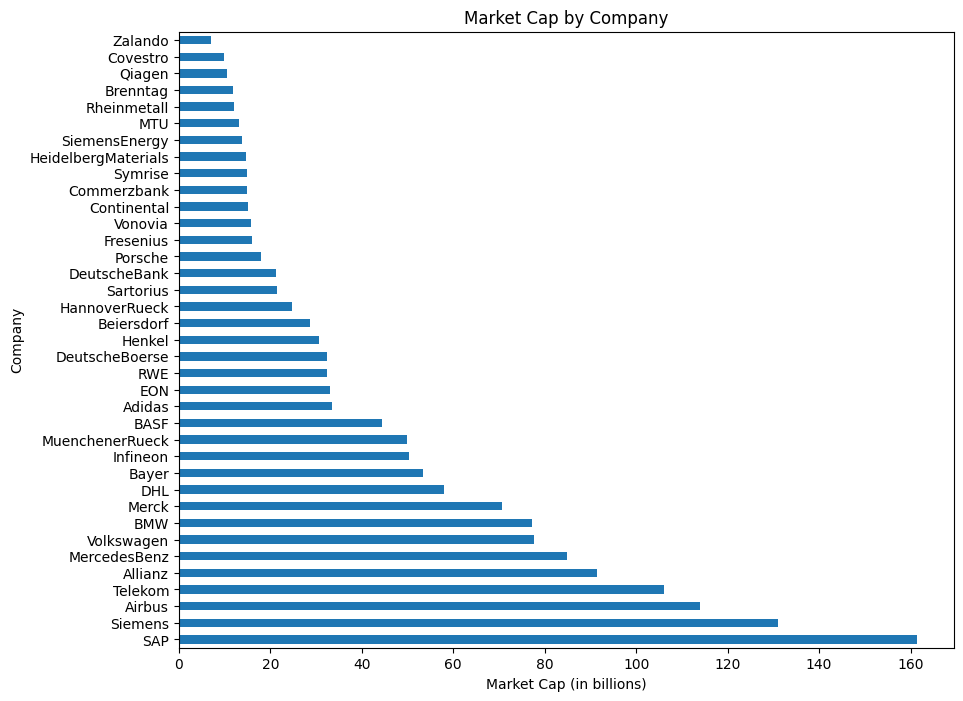

In [71]:
import matplotlib.pyplot as plt

# Sort the data by market cap in descending order
enriched_cleaned_data_new = enriched_cleaned_data_new.sort_values(by='market_cap_in_usd_b', ascending=False)

# Create a horizontal stacked bar chart
enriched_cleaned_data_new.plot(x='company', y=['market_cap_in_usd_b'], kind='barh', stacked=True, legend=False, figsize=(10, 8))

# Set the title and axis labels
plt.title('Market Cap by Company')
plt.xlabel('Market Cap (in billions)')
plt.ylabel('Company')

# Show the plot
plt.show()

### Stage 1: Data Analysis

# Setup & Data Loading

In [72]:
%pip install seaborn
%pip install scipy
%pip install scikit-learn
%pip install gensim


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [73]:

# Import needed packages
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import skew, kurtosis


In [74]:
file_path = '../data/checkpoints/enriched_cleaned_data_new.csv'

with open(file_path, 'r') as f:
    for i, line in enumerate(f, start=1):
        fields = line.split('|')
        if len(fields) != 1:  # Adjust this condition based on the expected number of fields
            print(f'Error in line {i}: {line}')

In [75]:
# Load a few rows from the CSV file
df_check = pd.read_csv('../data/checkpoints/enriched_cleaned_data_new.csv', delimiter=',', nrows=5)

# Print the loaded data
print(df_check)

               company               datatype  date  internal title  \
0             Infineon  Sustainability Report  2020         1   the   
1                 BASF  Sustainability Report  2020         1   the   
2  HeidelbergMaterials  Sustainability Report  2020         1     ,   
3              Porsche  Sustainability Report  2020         1   the   
4          Commerzbank  Sustainability Report  2020         1   the   

                                     cleaned_content  \
0  sustainability supplementing annual report nav...   
1  chapter page 2manage ments report overview non...   
2  unternehmens portrat strategie management wirt...   
3  sustainability management sustainability strat...   
4  especially independently particularly regard r...   

                                         word_tokens  \
0  ['sustainability', 'supplementing', 'annual', ...   
1  ['chapter', 'page', '2manage', 'ments', 'repor...   
2  ['unternehmens', 'portrat', 'strategie', 'mana...   
3  ['sustain

In [76]:
# Load the data
cleaned_data_last = pd.read_csv('../data/checkpoints/enriched_cleaned_data_new.csv', delimiter=',')


In [77]:
# Set the theme and figisze for a unique plot appearence
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [78]:
# Print the first 37 rows of the loaded data
print(cleaned_data_last.head(37))

                company               datatype  date  internal title  \
0              Infineon  Sustainability Report  2020         1   the   
1                  BASF  Sustainability Report  2020         1   the   
2   HeidelbergMaterials  Sustainability Report  2020         1     ,   
3               Porsche  Sustainability Report  2020         1   the   
4           Commerzbank  Sustainability Report  2020         1   the   
5                Qiagen  Sustainability Report  2020         1     ,   
6                Henkel  Sustainability Report  2020         1   the   
7          MercedesBenz  Sustainability Report  2020         1   the   
8                Airbus  Sustainability Report  2020         1   the   
9                   RWE  Sustainability Report  2020         1   the   
10                  EON  Sustainability Report  2020         1     ,   
11           Volkswagen  Sustainability Report  2020         1   the   
12             Brenntag  Sustainability Report  2020         1  

# Data Preparation & simple Feature Engineering

As a preperation step, the tokenzied words are converted to lists so later operations work as expected. The word counts for the tokenized words and sentences are introduced as simple features for later analysis.


In [79]:
# Define a function to convert a string representation of a list to a list datatype
def string_to_list(string):
    try:
        return ast.literal_eval(string)
    except (ValueError, SyntaxError):
        print('List conversion failed')
        return []

# Convert the string representations of the lists to the correct 'list' datatype
cleaned_data_last['word_tokens'] = cleaned_data_last['word_tokens'].apply(string_to_list)
cleaned_data_last['sentence_tokens'] = cleaned_data_last['sentence_tokens'].apply(string_to_list)
cleaned_data_last['pos_tagged_word_tokens'] = cleaned_data_last['pos_tagged_word_tokens'].apply(string_to_list)
cleaned_data_last['pos_tagged_sentence_tokens'] = cleaned_data_last['pos_tagged_sentence_tokens'].apply(string_to_list)


In [80]:
# Add some count features for the analysis
cleaned_data_last['cnt_word'] = cleaned_data_last['word_tokens'].apply(len)
cleaned_data_last['cnt_sentence'] = cleaned_data_last['sentence_tokens'].apply(len)

# Calculate ratio between words/sentences
cleaned_data_last['ratio_word_sentence'] = cleaned_data_last['cnt_word'] / cleaned_data_last['cnt_sentence']

In [81]:
# Check the data with a few samples
cleaned_data_last.sample(5)

,company,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry,st1_sentiment_continuous,cnt_word,cnt_sentence,ratio_word_sentence
17,Merck,Sustainability Report,2020,1,the,sustainability report merck sustainability rep...,"[sustainability, report, merck, sustainability...",[sustainability report merck sustainability re...,"[(sustainability, NN), (report, NN), (merck, V...","[[(sustainability, NN), (report, NN), (merck, ...",MERCK Kommanditgesellschaft auf Aktien,MRK,70.69,Germany,Healthcare,Drug Manufacturers—Specialty & Generic,0.018972,53424,3478,15.360552
31,Continental,Sustainability Report,2020,1,the,turn change opportunity embrace sustainability...,"[turn, change, opportunity, embrace, sustainab...",[turn change opportunity embrace sustainabilit...,"[(turn, NN), (change, NN), (opportunity, NN), ...","[[(turn, NN), (change, NN), (opportunity, NN),...",Continental AG,CON,15.16,Germany,Consumer Discretionary,Auto Parts,0.018159,34634,2198,15.757052
24,Covestro,Sustainability Report,2020,1,the,shareholder combined management report consoli...,"[shareholder, combined, management, report, co...",[shareholders combined management report conso...,"[(shareholder, NN), (combined, VBD), (manageme...","[[(combined, VBD), (management, NN), (report, ...",Covestro AG,1COV,9.87,Germany,Basic Materials,Specialty Chemicals,0.018477,39944,2634,15.164768
22,Rheinmetall,Sustainability Report,2020,1,the,financial aspect business activity general pub...,"[financial, aspect, business, activity, genera...",[financial aspects business activities general...,"[(financial, JJ), (aspect, NN), (business, NN)...","[[(financial, JJ), (business, NN), (general, J...",Rheinmetall AG,RHM,11.96,Germany,Industrials,Industrial Distribution,0.019944,7653,485,15.779381
2,HeidelbergMaterials,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"[unternehmens, portrat, strategie, management,...",[unternehmens portrat strategie management wir...,"[(unternehmens, NNS), (portrat, VBP), (strateg...","[[(unternehmens, VBZ), (portrat, JJ), (strateg...",Heidelberg Materials AG,HEI,14.65,Germany,Basic Materials,Building Materials,0.016767,42061,2539,16.565971


# General Descriptive Analysis 

To get a fast overview in terms of the statistial key metrics, several functions are defined. These ensure quick insights into the data.

In [82]:
def plot_basic_hist_and_box(column, data):
    """
    Plots a histogram and boxplot of a specified column in a pandas DataFrame.

    Args:
    - column (str): The name of the column to plot.
    - data (pandas DataFrame): The DataFrame containing the column.

    Returns:
    - None
    """
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

def calculate_basic_statistical_properties(column, data):
    """
    Calculates basic statistical properties of a specified column in a pandas DataFrame.

    Args:
    - column (str): The name of the column to analyze.
    - data (pandas DataFrame): The DataFrame containing the column.

    Returns:
    - None
    """
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode().values[0]
    skewness = skew(data[column].dropna())
    kurt = kurtosis(data[column].dropna())
    
    print(f'Mean: {round(mean,2)}\nMedian: {round(median,2)}\nMode: {round(mode,2)}\nSkewness: {round(skewness,2)}\nKurtosis: {round(kurt,2)}')

def calulate_dispersion_measures(column, data):
    """
    Calculates measures of dispersion of a specified column in a pandas DataFrame.

    Args:
    - column (str): The name of the column to analyze.
    - data (pandas DataFrame): The DataFrame containing the column.

    Returns:
    - None
    """
    min_value = data[column].min()
    max_value = data[column].max()
    range_value = max_value - min_value
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    variance = data[column].var()
    std_dev = data[column].std()
    
    print(f'Range: {round(range_value,2)}\nInterquartile Range: {round(iqr,2)}\nVariance: {round(variance,2)}\nStandard Deviation: {round(std_dev,2)}')

### Basic Statistical Metrics of documents by Words

Mean: 27822.68
Median: 28306.0
Mode: 1521
Skewness: 0.94
Kurtosis: 1.57
Range: 89178
Interquartile Range: 26737.0
Variance: 352823987.95
Standard Deviation: 18783.61


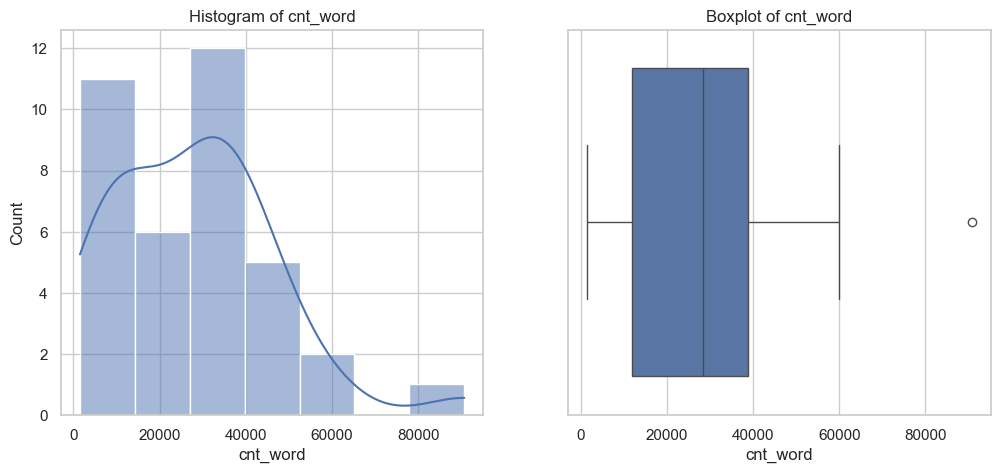

In [83]:
calculate_basic_statistical_properties('cnt_word', cleaned_data_last)
calulate_dispersion_measures('cnt_word', cleaned_data_last)
plot_basic_hist_and_box('cnt_word', cleaned_data_last)

In [84]:
average_sentiment = cleaned_data_last.groupby('company')['st1_sentiment_continuous'].mean()
print(average_sentiment)

company
Adidas                 0.018613
Airbus                 0.017776
Allianz                0.017895
BASF                   0.017913
BMW                    0.018028
Bayer                  0.018532
Beiersdorf             0.019710
Brenntag               0.019500
Commerzbank            0.017304
Continental            0.018159
Covestro               0.018477
DHL                    0.018219
DeutscheBank           0.018190
DeutscheBoerse         0.015485
EON                    0.017606
Fresenius              0.018467
HannoverRueck          0.018603
HeidelbergMaterials    0.016767
Henkel                 0.020071
Infineon               0.018614
MTU                    0.018324
MercedesBenz           0.019140
Merck                  0.018972
MuenchenerRueck        0.018061
Porsche                0.019692
Qiagen                 0.020028
RWE                    0.017856
Rheinmetall            0.019944
SAP                    0.018049
Sartorius              0.017233
Siemens                0.013965


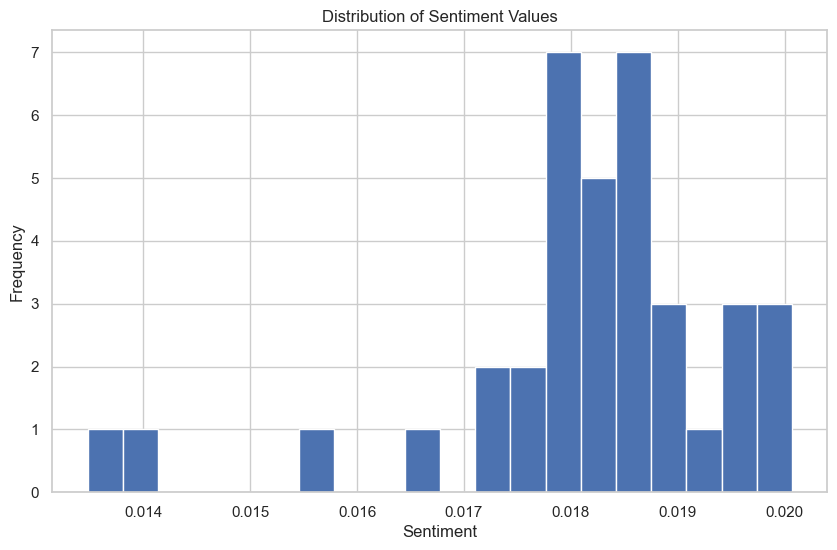

In [85]:
import matplotlib.pyplot as plt

plt.hist(cleaned_data_last['st1_sentiment_continuous'], bins=20)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Values')
plt.show()

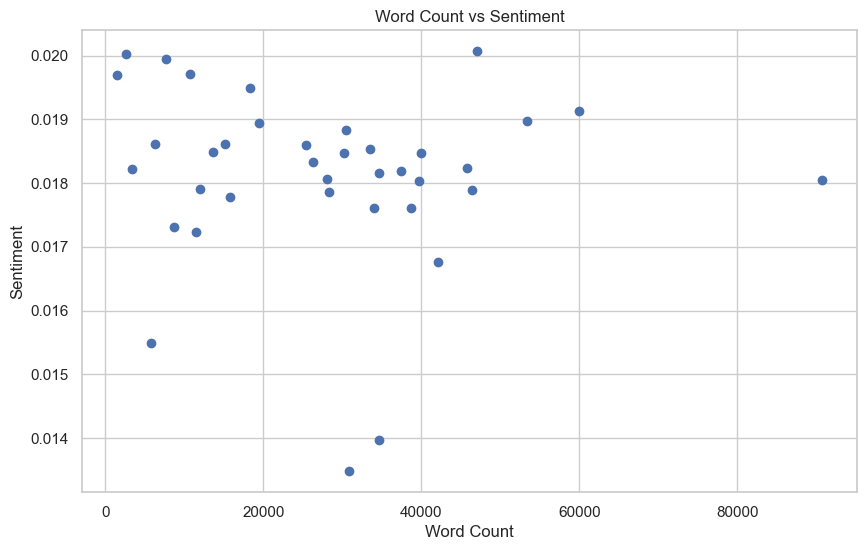

In [86]:
plt.scatter(cleaned_data_last['cnt_word'], cleaned_data_last['st1_sentiment_continuous'])
plt.xlabel('Word Count')
plt.ylabel('Sentiment')
plt.title('Word Count vs Sentiment')
plt.show()

In [87]:
average_sentiment_by_country = cleaned_data_last.groupby('country')['st1_sentiment_continuous'].mean()
print(average_sentiment_by_country)

country
Germany        0.018085
Netherlands    0.018902
Name: st1_sentiment_continuous, dtype: float64


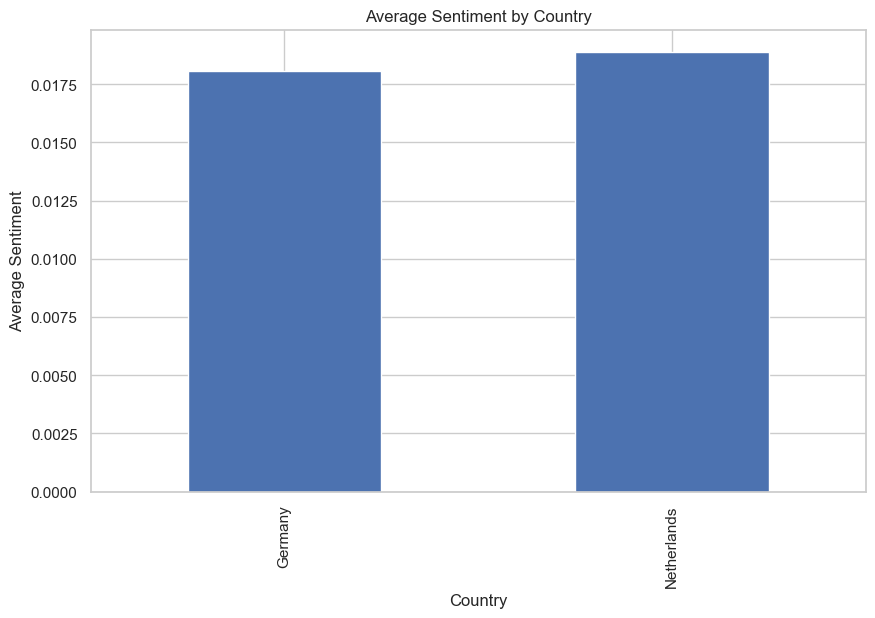

In [88]:
average_sentiment_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Country')
plt.show()

In [89]:
average_sentiment_by_industry = cleaned_data_last.groupby('industry')['st1_sentiment_continuous'].mean()
print(average_sentiment_by_industry)

industry
Aerospace & Defense                       0.018050
Auto Manufacturers                        0.017584
Auto Parts                                0.018159
Banks—Regional                            0.017747
Building Materials                        0.016767
Chemicals                                 0.017913
Diagnostics & Research                    0.020028
Drug Manufacturers—General                0.018532
Drug Manufacturers—Specialty & Generic    0.018972
Financial Data & Stock Exchanges          0.015485
Footwear & Accessories                    0.018613
Household & Personal Products             0.019890
Industrial Distribution                   0.019944
Insurance—Diversified                     0.017895
Insurance—Reinsurance                     0.018332
Integrated Freight & Logistics            0.018219
Internet Retail                           0.018484
Medical Care Facilities                   0.018467
Medical Instruments & Supplies            0.017233
Real Estate Services  

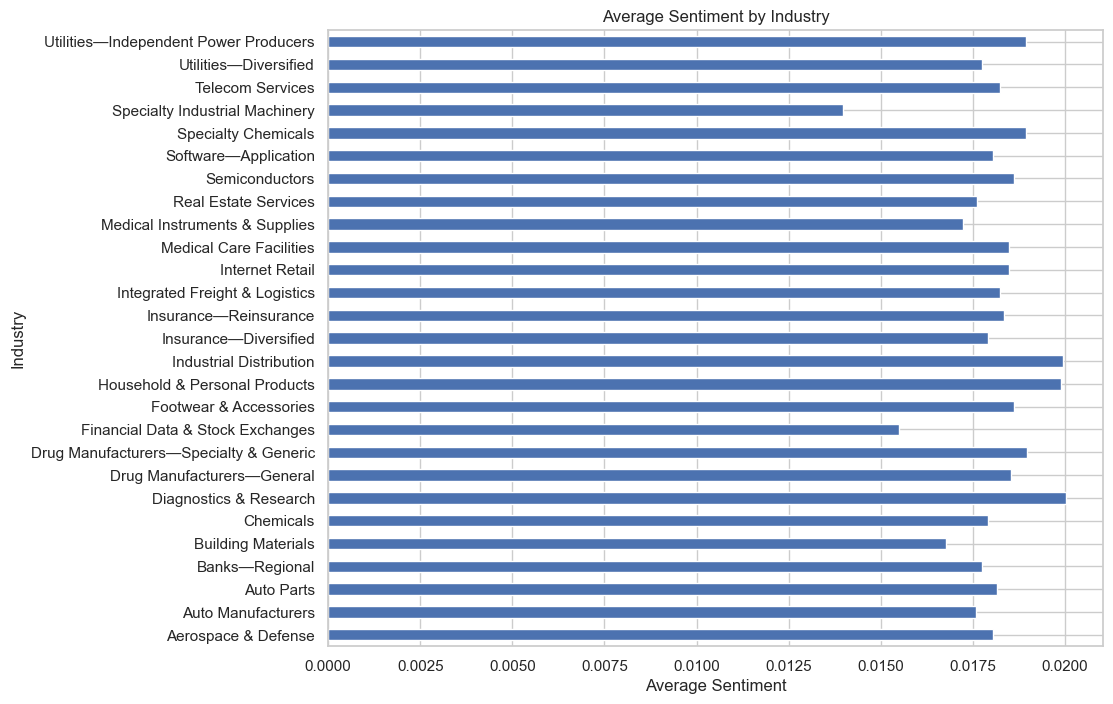

In [90]:
average_sentiment_by_industry.plot(kind='barh', figsize=(10, 8))
plt.xlabel('Average Sentiment')
plt.ylabel('Industry')
plt.title('Average Sentiment by Industry')
plt.show()

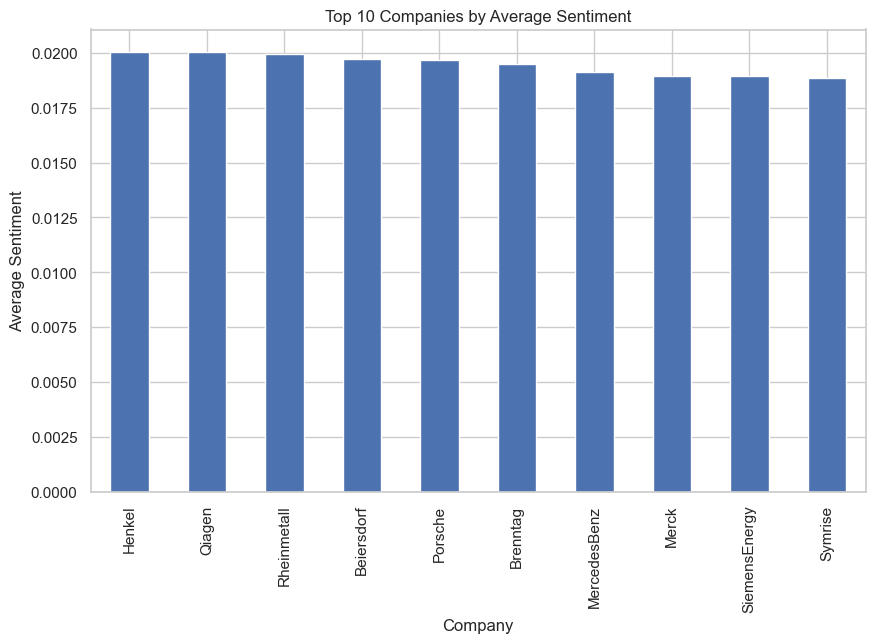

In [91]:
average_sentiment_by_company = cleaned_data_last.groupby('company')['st1_sentiment_continuous'].mean()
top_10_companies = average_sentiment_by_company.sort_values(ascending=False).head(10)

top_10_companies.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Average Sentiment')
plt.title('Top 10 Companies by Average Sentiment')
plt.show()

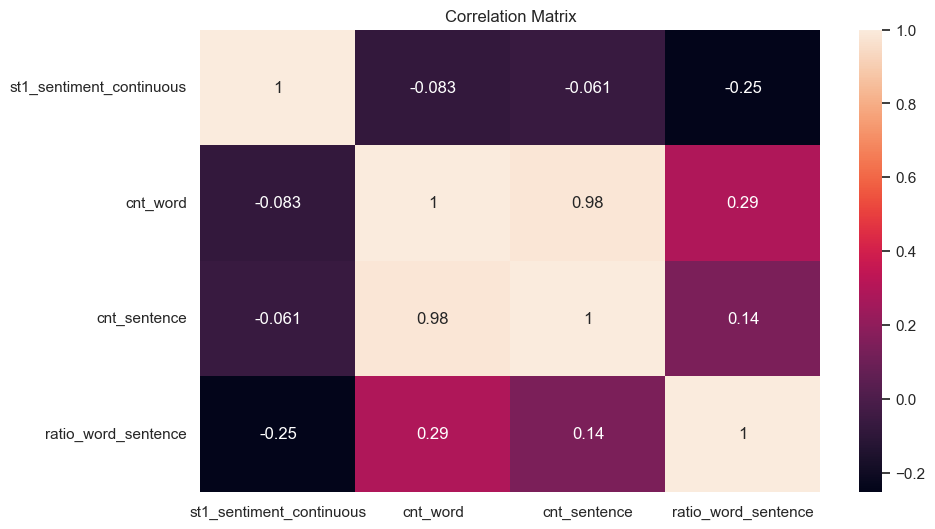

In [92]:
correlation_matrix = cleaned_data_last[['st1_sentiment_continuous', 'cnt_word', 'cnt_sentence', 'ratio_word_sentence']].corr()

import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

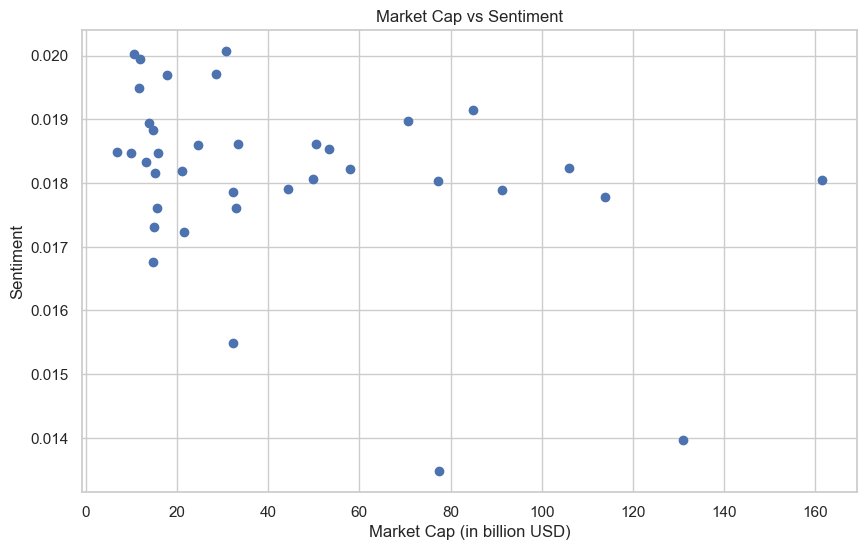

In [93]:
# Convert market cap to numeric
cleaned_data_last['market_cap_in_usd_b'] = pd.to_numeric(cleaned_data_last['market_cap_in_usd_b'], errors='coerce')

plt.scatter(cleaned_data_last['market_cap_in_usd_b'], cleaned_data_last['st1_sentiment_continuous'])
plt.xlabel('Market Cap (in billion USD)')
plt.ylabel('Sentiment')
plt.title('Market Cap vs Sentiment')
plt.show()

In [94]:
# Define bins for market cap
bins = [0, 10, 50, 100, np.inf]
labels = ['Small', 'Medium', 'Large', 'Very Large']
cleaned_data_last['market_cap_group'] = pd.cut(cleaned_data_last['market_cap_in_usd_b'], bins=bins, labels=labels)

# Calculate average sentiment by market cap group
average_sentiment_by_market_cap_group = cleaned_data_last.groupby('market_cap_group')['st1_sentiment_continuous'].mean()
print(average_sentiment_by_market_cap_group)

market_cap_group
Small         0.018481
Medium        0.018387
Large         0.017860
Very Large    0.017005
Name: st1_sentiment_continuous, dtype: float64


/var/folders/ln/8_743tps409d2_3d_6px3_nc0000gn/T/ipykernel_82768/2022677677.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sentiment_by_market_cap_group = cleaned_data_last.groupby('market_cap_group')['st1_sentiment_continuous'].mean()


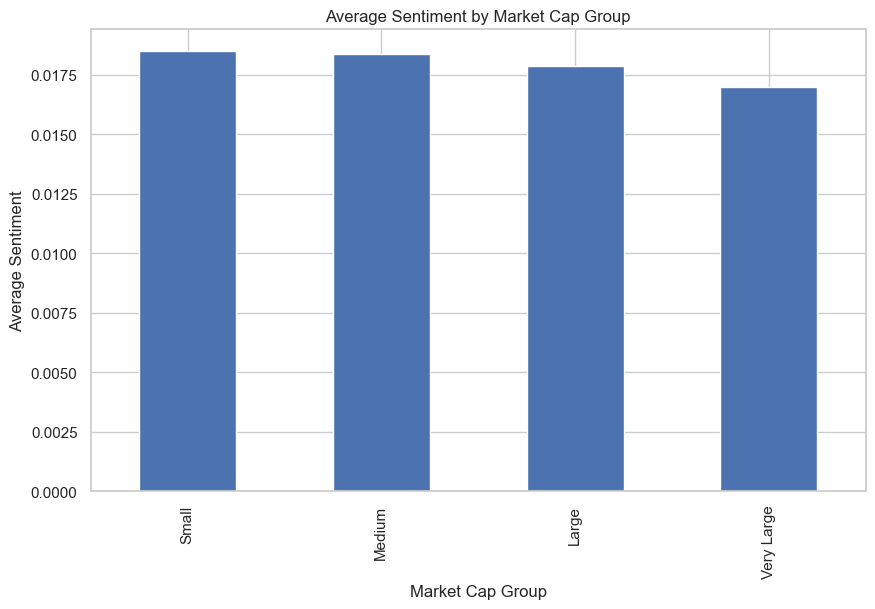

In [95]:
average_sentiment_by_market_cap_group.plot(kind='bar')
plt.xlabel('Market Cap Group')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Market Cap Group')
plt.show()

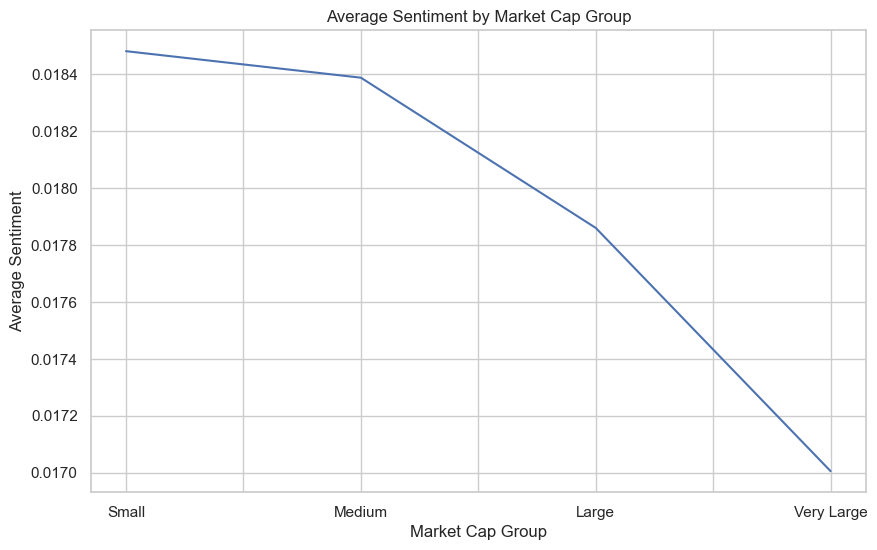

In [96]:
average_sentiment_by_market_cap_group.plot(kind='line')
plt.xlabel('Market Cap Group')
plt.ylabel('Average Sentiment')‚
plt.title('Average Sentiment by Market Cap Group')
plt.show()

# HALLOOOOOO